<a href="https://colab.research.google.com/github/mar-ale-fer/dio-ml-bootcamp/blob/main/maralefer_dimensionality_reduction_gray_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from PIL import Image

In [79]:
from google.colab import drive
import shutil
import os

In [80]:
# Libraries out of the scope of the solution, only to have image previews
import matplotlib.pyplot as plt
import numpy as np

In [81]:
class Picture:
  def __init__(self, file_path):
    self.file_path = file_path
    self.matrix = [] # To store 2D RGB data
    self.load_image()

  def load_image(self):
    #Open the image
    img = Image.open(self.file_path).convert("RGB")
    self.width, self.height = img.size

    # This doesn't work, to better debugging I replace it with two 'for' sentences
    # Convert image to a 2D RGB matrix
    # self.matrix = [
    #  [img.getpixel((x,y))
    #    for x in range(self.width)
    #      for y in range(self.height)]
    #]

    # Populate the matrix row by row
    for y in range(self.height):  # Loop over each row
        row = []  # Create a new row
        for x in range(self.width):  # Loop over each column in the row
            pixel = img.getpixel((x, y))  # Get the RGB value of the pixel
            row.append(pixel)  # Add the pixel to the current row
        self.matrix.append(row)  # Add the completed row to the matrix


    # Debugging: Check matrix structure
    print(f"Image Dimensions: {self.height}x{self.width}")
    print(f"Matrix Dimensions: {len(self.matrix)} rows, {len(self.matrix[0])} columns")
    print(f"Sample Pixel (Top-Left): {self.matrix[0][0]}")  # Should be a tuple like (R, G, B)

  def convert_to_grayscale(self):
    # Convert the 2D RGB matrix to grayscale
    grayscale_matrix = []
    for row in self.matrix:
      grayscale_row = [
          int(3/10 * r + 6/10 * g + 1/10 * b) for r, g, b in row
      ]
      grayscale_matrix.append(grayscale_row)
    return grayscale_matrix

In [82]:
# Step 1: Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


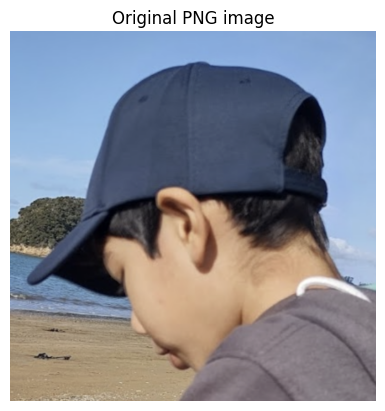

In [83]:
# Display the original PNG image
original_image_path = "/content/drive/My Drive/colabdata/bauty/bauty20.png"
original_image = Image.open(original_image_path)

plt.imshow(original_image)
plt.title("Original PNG image")
plt.axis("off")
plt.show()

In [92]:
#Usage Example
picture= Picture(original_image_path)

Image Dimensions: 1128x1116
Matrix Dimensions: 1128 rows, 1116 columns
Sample Pixel (Top-Left): (125, 161, 210)


In [93]:
print("Pixel:", picture.matrix[1][0])

Pixel: (125, 161, 210)


In [87]:
# Convert to grayscale
grayscale_matrix = picture.convert_to_grayscale()
print("Grayscale Array Shape:", grayscale_array.shape)
print("Grayscale Matrix Example (First Pixel)", grayscale_matrix[0][0])

Grayscale Array Shape: (1128, 1116)
Grayscale Matrix Example (First Pixel) 155


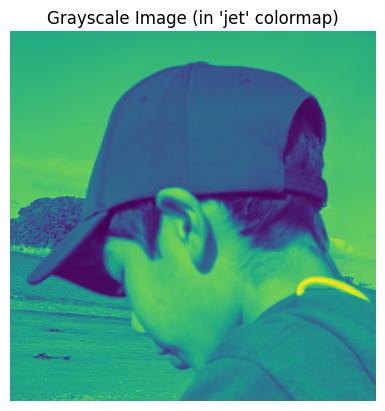

In [88]:
# Show grayscale image

# Convert to a NumPy array
np_grayscale_array = np.array(grayscale_matrix, dtype=np.uint8 )

plt.imshow(np_grayscale_array)
plt.title("Grayscale Image (in 'jet' colormap)")
plt.axis("off")
plt.show()

In [89]:
# Utility wich, based on a grayscale image, generates a binary image

def convert_to_binary( grayscale_matrix, threshold= 127):
  binary_matrix = []

  for row in grayscale_matrix:
    binary_row = [
          1 if graycolor > threshold else 0 for graycolor in row
      ]

    binary_matrix.append(binary_row) # Add the row to the binary matrix

  return np.array(binary_matrix) #I convert to np array for better debugging

In [90]:
binary_matrix = convert_to_binary(grayscale_matrix)
print("Binary Array Shape:", binary_matrix.shape)
print("Binary Matrix Example (First Pixel)", binary_matrix[0][0])

Binary Array Shape: (1128, 1116)
Binary Matrix Example (First Pixel) 1


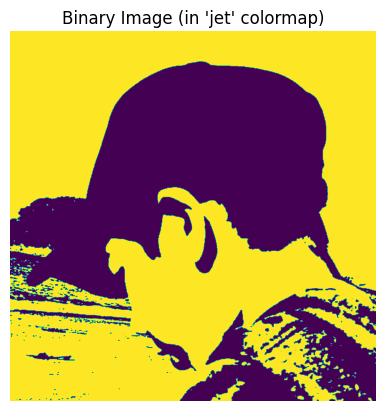

In [91]:
# Show binary image

np_binary_array = np.array(binary_matrix, dtype=np.uint8 )

plt.imshow(binary_matrix)
plt.title("Binary Image (in 'jet' colormap)")
plt.axis("off")
plt.show()